In [1]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 6.8 MB/s eta 0:00:19
   ---------------------------------------- 0.5/124.9 MB 7.6 MB/s eta 0:00:17
   ---------------------------------------- 1.3/124.9 MB 13.9 MB/s eta 0:00:09
    --------------------------------------- 1.9/124.9 MB 15.5 MB/s eta 0:00:08
    --------------------------------------- 2.2/124.9 MB 15.6 MB/s eta 0:00:08
    --------------------------------------- 2.8/124.9 MB 12.8 MB/s eta 0:00:10
   - -------------------------------------- 3.7/124.9 MB 17.0 MB/s eta 0:00:08
   - -------------------------------------- 5.4/124.9 MB 19.0 MB/s eta 0:00:07
   -- ------------------------------------- 6.4/124.9 MB 19.4 MB/s eta 0:00:07
   -- ------------------------------------- 7.3/124.9 MB 19.5 MB/s eta 0:00:07
   -- ------------------------------------- 7.8/124.9 MB 19.1 MB/s eta 0:00:07
   -- ------------------------------------- 9.0/124.9 MB 20.6 


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import torch
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load your data (assuming the embeddings and labels are already loaded as torch tensors)
train_embeddings = torch.load('Fine_tuned_embeddings/train_embeddings.pt').to('cpu')
test_embeddings = torch.load('Fine_tuned_embeddings/test_embeddings.pt').to('cpu')
val_embeddings = torch.load('Fine_tuned_embeddings/val_embeddings.pt').to('cpu')

train_labels = torch.load('Fine_tuned_embeddings/train_labels_tensor.pt').to('cpu')
test_labels = torch.load('Fine_tuned_embeddings/test_labels_tensor.pt').to('cpu')
val_labels = torch.load('Fine_tuned_embeddings/val_labels_tensor.pt').to('cpu')

In [20]:


# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(train_embeddings, label=train_labels)
dval = xgb.DMatrix(val_embeddings  , label=val_labels)
dtest = xgb.DMatrix(test_embeddings    , label=test_labels)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',  # Binary classification task
    'eval_metric': 'logloss',        # Evaluation metric
    'eta': 0.1,                      # Learning rate
    'max_depth': 6,                  # Maximum depth of a tree
    'alpha': 10,                     # L1 regularization term
    'lambda': 1,                     # L2 regularization term
    'scale_pos_weight': 1,           # Scale weight for positive class
}

# Train the XGBoost model
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round, evals=[(dval, 'eval')], early_stopping_rounds=10)

# Predict probabilities
train_probs = bst.predict(dtrain)
val_probs = bst.predict(dval)
test_probs = bst.predict(dtest)

# Predict classes
train_preds = (train_probs > 0.5).astype(int)
val_preds = (val_probs > 0.5).astype(int)
test_preds = (test_probs > 0.5).astype(int)

# Metrics calculation
def print_metrics(y_true, y_pred, y_probs, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_probs)
    
    print(f"{dataset_name} Set Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print()
    
    return accuracy, precision, recall, f1, roc_auc

print_metrics(train_labels, train_preds, train_probs, "Train")
print_metrics(val_labels, val_preds, val_probs, "Validation")
print_metrics(test_labels, test_preds, test_probs, "Test")





[0]	eval-logloss:0.62455
[1]	eval-logloss:0.56810
[2]	eval-logloss:0.52105
[3]	eval-logloss:0.48124
[4]	eval-logloss:0.44731
[5]	eval-logloss:0.41824
[6]	eval-logloss:0.39298
[7]	eval-logloss:0.37112
[8]	eval-logloss:0.35192
[9]	eval-logloss:0.33529
[10]	eval-logloss:0.32056
[11]	eval-logloss:0.30764
[12]	eval-logloss:0.29620
[13]	eval-logloss:0.28605
[14]	eval-logloss:0.27714
[15]	eval-logloss:0.26931
[16]	eval-logloss:0.26239
[17]	eval-logloss:0.25615
[18]	eval-logloss:0.25056
[19]	eval-logloss:0.24566
[20]	eval-logloss:0.24137
[21]	eval-logloss:0.23751
[22]	eval-logloss:0.23401
[23]	eval-logloss:0.23081
[24]	eval-logloss:0.22785
[25]	eval-logloss:0.22541
[26]	eval-logloss:0.22313
[27]	eval-logloss:0.22112
[28]	eval-logloss:0.21936
[29]	eval-logloss:0.21773
[30]	eval-logloss:0.21625
[31]	eval-logloss:0.21491
[32]	eval-logloss:0.21369
[33]	eval-logloss:0.21261
[34]	eval-logloss:0.21160
[35]	eval-logloss:0.21068
[36]	eval-logloss:0.20991
[37]	eval-logloss:0.20908
[38]	eval-logloss:0.20

(0.9276505842279998,
 0.9254716981132075,
 0.9302586206896551,
 0.9278589853826311,
 0.9776634718632232)

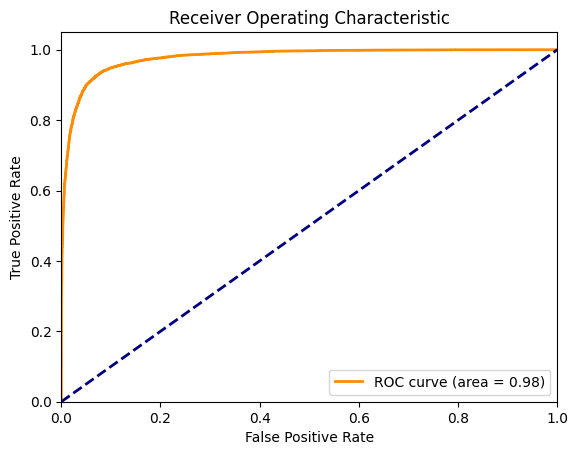

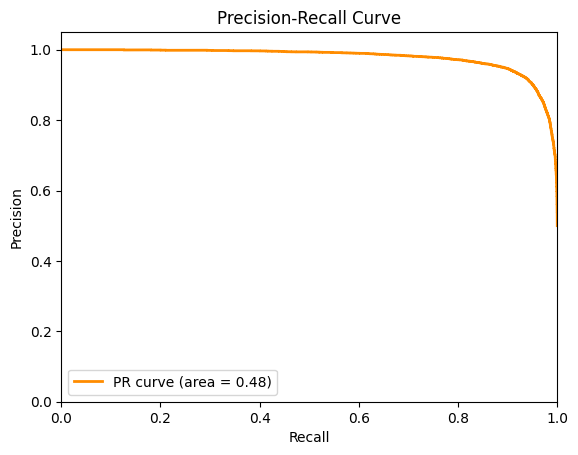

In [13]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(test_labels, test_probs)
roc_auc = roc_auc_score(test_labels, test_probs)
    
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve

precision, recall, _ = precision_recall_curve(test_labels, test_probs)
pr_auc = np.trapz(recall, precision)
    
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



In [19]:
conf_matrix = confusion_matrix(test_labels, test_preds)
print (conf_matrix)

[[10724   869]
 [  809 10791]]


In [21]:
from sklearn.metrics import classification_report
print("\nClassification Report (Test Set):")
print(classification_report(test_labels, test_preds))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11593
           1       0.93      0.93      0.93     11600

    accuracy                           0.93     23193
   macro avg       0.93      0.93      0.93     23193
weighted avg       0.93      0.93      0.93     23193

